In [1]:
import numpy as np
import pandas as pd
import rdata
import matplotlib.pyplot as plt

import correlation_correction.methods.hamling_methods as ham
import correlation_correction.methods.gl_methods as gl
import correlation_correction.regressions as reg

In [2]:
directory_name_PAD = "/Volumes/mnt/team/team/pub/sub_risks/tobacco/code/xdai88/gbd2020_smoking/relative_risk_curves/cleaned_all_data/00_prepped_data/peripheral_artery_disease.RDS"
parsed = rdata.parser.parse_file(directory_name_PAD)
converted = rdata.conversion.convert(parsed)
df = converted["df"]
df

/opt/anaconda3/envs/correlationCorrection/lib/python3.12/site-packages/rdata/parser/_parser.py:1217: UserWarning: Unknown file type: assumed RDS
  warnings.warn("Unknown file type: assumed RDS")  # noqa: B028
/opt/anaconda3/envs/correlationCorrection/lib/python3.12/site-packages/rdata/parser/_parser.py:1220: UserWarning: Wrong extension .RDS for file in RDS format
  warnings.warn(f"Wrong extension {extension} for file in RDS format")  # noqa: B028


,nid,ln_effect,ln_se,b_0,b_1,a_0,a_1,percent_male,age_start,age_end,age_ref,cv_adj_L0,cv_exposure_study,cv_outcome_selfreport,cv_subpopulation
1,350659,2.189416,0.310522,0,14.0,0,0,0.000,45,83,1,0,1,0,1
2,350659,2.830268,0.239299,15,22.5,0,0,0.000,45,83,1,0,1,0,1
3,359221,1.205971,0.306275,1,20.0,0,0,1.000,35,64,1,0,1,0,0
4,359221,1.534714,0.294687,19,28.5,0,0,1.000,35,64,1,0,1,0,0
5,359223,1.054312,0.329766,0,24.0,0,0,1.000,65,83,1,1,1,0,0
6,359223,2.534490,0.485928,25,37.5,0,0,1.000,65,83,1,1,1,0,0
7,369290,2.116256,1.055330,1,20.0,0,0,0.880,18,99,1,0,1,0,1
8,369290,2.351375,1.148031,21,40.0,0,0,0.880,18,99,1,0,1,0,1
9,369290,2.708050,1.605736,41,61.5,0,0,0.880,18,99,1,0,1,0,1
10,462792,1.249902,0.110890,1,14.0,0,0,0.500,45,99,1,0,1,1,0


In [3]:
flat_df = df[df["nid"] == 369290]
flat_df

,nid,ln_effect,ln_se,b_0,b_1,a_0,a_1,percent_male,age_start,age_end,age_ref,cv_adj_L0,cv_exposure_study,cv_outcome_selfreport,cv_subpopulation
7,369290,2.116256,1.055330,1,20.0,0,0,0.88,18,99,1,0,1,0,1
8,369290,2.351375,1.148031,21,40.0,0,0,0.88,18,99,1,0,1,0,1
9,369290,2.708050,1.605736,41,61.5,0,0,0.88,18,99,1,0,1,0,1


In [7]:
x = np.array([(1+20)/2, (21+40)/2, (41+61.5)/2])
L = flat_df["ln_effect"].to_numpy()
v = flat_df["ln_se"].to_numpy()**2

# GL data
N = np.array([13+45, 32+27, 24+8, 10+1])
M1 = 13 + 32 + 24 + 10

# Hamling data
b0 = 45
B_sum = 45 + 27 + 8 + 1
p = b0 / B_sum
z = B_sum / M1

In [9]:
ham.hamling(L,p,z,v)

(array([6.35095233, 4.97296808, 2.12143196]),
 array([3.83258201, 2.3722315 , 0.70838367]),
 1.7252611514278573,
 8.64142845621376)

In [10]:
gl.convex_gl(L,N,M1)

(array([37.96630242, 22.25598177,  8.41956234]),
 array([21.03369758,  9.74401823,  2.58043766]),
 10.358153477765356,
 47.641846522234644)

In [14]:
C_ham = reg.covariance_matrix_hamling(L,p,z,v)
C_gl = reg.covariance_matrix_convex_gl(L,N,M1,v)

In [18]:
bstar_ham, vstar_ham = reg.gls_reg(C_ham,L,x)
bstar_gl, vstar_gl = reg.gls_reg(C_gl,L,x)

In [27]:
b, v_reg = reg.wls_reg(L,x,v)

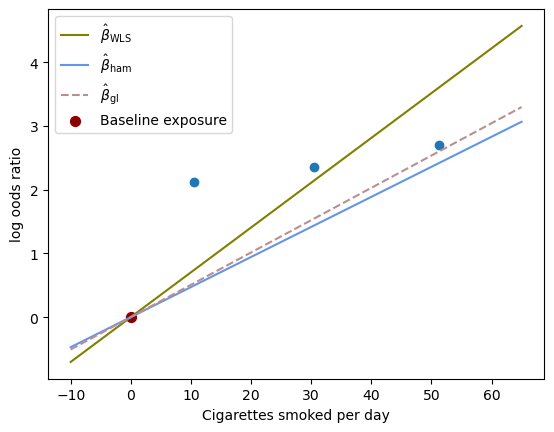

In [31]:
def slope_fn(beta,x):
    return beta*x

x_pts = np.linspace(-10,65)

# plt.plot(x,slope_fn(beta_s,x),label="No weights--S",c="olive")
# plt.fill_between(x,slope_fn(low_beta_s,x),slope_fn(high_beta_s,x),alpha=0.3,color="olive")
# plt.plot(x,slope_fn(beta_s_GL,x),label="Weights--S",c="cornflowerblue")
# plt.fill_between(x,slope_fn(low_beta_s_GL,x),slope_fn(high_beta_s_GL,x),alpha=0.3,color="cornflowerblue")
plt.plot(x_pts,slope_fn(b,x_pts),label=r"$\hat \beta_{\mathrm{WLS}}$",c="olive")
plt.plot(x_pts,slope_fn(bstar_ham,x_pts),label=r"$\hat \beta_{\mathrm{ham}}$",c="cornflowerblue")
plt.plot(x_pts,slope_fn(bstar_gl,x_pts),label=r"$\hat \beta_{\mathrm{gl}}$",c="rosybrown",linestyle="dashed")
# plt.plot(x,slope_fn(bstar,x)-0.063,label="Intercept",linestyle="dashed",c="cornflowerblue")
plt.scatter(x,L)

plt.scatter(0,0,c="darkred",s=50,label="Baseline exposure")
plt.ylabel("log oods ratio")
plt.xlabel("Cigarettes smoked per day")
plt.legend()
# plt.savefig("images/itoga_regression.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()

In [32]:
bstar_ham

0.047166870718355465

In [33]:
b

0.07030102675559657